In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Gray.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-a2b45cb387ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-a2b45cb387ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.858246,0.780689,0.522025,0.307620,0.227557,0.115031,0.084342,0.073904,0.030271,0.000000,...,0.391232,0.433299,0.483090,1.000000,0.702088,0.181837,0.061482,0.199896,0.406785,1
1,0.847544,0.524104,0.396073,0.344640,0.323532,0.321043,0.256890,0.206932,0.338649,0.375795,...,0.732879,0.573325,0.368237,0.709190,1.000000,0.471841,0.337819,0.328970,0.313762,1
2,0.586800,0.250174,0.044736,0.193934,0.406112,0.018592,0.000000,0.039856,0.189170,0.660702,...,0.389031,0.553567,0.860795,0.940855,0.897630,0.473507,0.333023,0.454915,0.768301,1
3,0.638496,0.686763,0.859187,1.000000,0.703536,0.720192,0.894962,0.736086,0.738842,0.886282,...,0.000411,0.000411,0.000411,0.000000,0.048091,0.025218,0.003167,0.003578,0.003812,1
4,0.497339,0.265363,0.130395,0.042335,0.230281,0.321692,0.178091,0.489732,0.498404,0.372896,...,0.746423,0.523276,0.578856,0.934053,0.187473,0.200520,0.500769,0.082187,0.000000,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8035714285714286
              precision    recall  f1-score   support

          -1       0.88      0.89      0.88       142
           1       0.36      0.35      0.35        26

    accuracy                           0.80       168
   macro avg       0.62      0.62      0.62       168
weighted avg       0.80      0.80      0.80       168



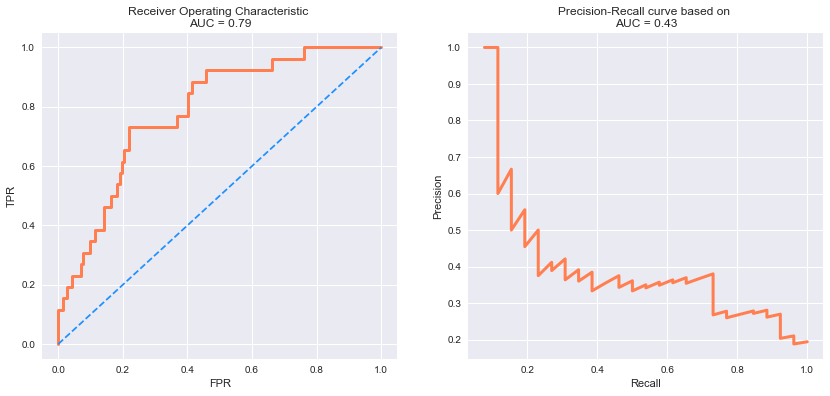

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()